# Intro to Text as Data (UMN LATIS/Libraries)

## Intro
This workshop will cover how to:
- Read and write text files in Python
- Manipulate ‘strings’ of text
- Pre-process and clean text for analysis
- Count and plot word frequencies
- Conduct sentiment analysis
- ~Run basic topic models~

### Prereqs
Be familiar with Python. Have some previous experience with an introductory Python workshop, for example.

## JupyterLab - Get attendees set up
We'll share JupyterLab features as we go, but to get started let's create a new blank `workshop.ipynb` file that you can work with throughout the workshop. 

Note the control icons above the Notebook. You can use these to:
- add new cells
- run code (which you can also do, using control-shift)
- and switch cells from code to markdown

### Reading files

Let's start to work with text by reading it in from a series of text files.

For most text as data projects, your first step is going to be to read in the files containing the data. Common file types for text data are: 
* `.txt`
* `.csv`
* `.json`
* `.html` 
* `.xml`

Each file format requires specific Python tools or methods to read, but for our case, we'll be working with .txt files.

#### Reading in `.txt` files

Python has built-in support for reading in `.txt` files.

Let's take a look at the first file in our directory (folder) of State of the Union addresses which is located one directory back from the `text_as_data` folder (`../sotu_kaggle`). These text files are available to [download on Kaggle](https://www.kaggle.com/datasets/rtatman/state-of-the-union-corpus-1989-2017).

In [1]:
# create a new variable called file1 and read ("r") the first file in the sotu_text folder
file1 = open('../sotu_kaggle/Clinton_1995.txt','r') 

If we try to print out the file, however, it's not yet stored as a Python string, but as an encoded text "wrapper" from the io (input/output) Python module.

In [2]:
# Printing doesn't print the contents
print(file1)

<_io.TextIOWrapper name='../sotu_kaggle/Clinton_1995.txt' mode='r' encoding='UTF-8'>


To access the text, we can use the .read() method of the `TextIOWrapper` and then use the string index of the text object to show the first 250 characters. Once we save the contents of the file1 text to a new variable we can close the file1 object so that our computer memory doesn't have to keep track of that.

In [3]:
text = file1.read()
print(text[0:250])
file1.close()

Mr. President, Mr. Speaker, members of the 104th Congress, my fellow
Americans:

Again we are here in the sanctuary of democracy. And once again, our
democracy has spoken.

So let me begin by congratulating all of you here in the 104th Congress,
and 


A more efficient way to work with text files in Python is to use a `with` statement, which will automatically close the file for you:

In [3]:
with open('../sotu_kaggle/Clinton_1995.txt','r') as file1:
    text = file1.read()   

### Tokenization

Once we've read in the data, a common next step is to split a longer string into words or-—more helpfully-—"word chunks" called "tokens." This step is referred to as "tokenization". Tokens can be of any length (sentences, words, or parts of words), but usually we want to reduce our text into meaningful word chunks. 

#### Tokenizing by whitespace
An easy way to tokenize a string, though not the most accurate, is to split up a string using whitespace. Let's save each word to a list variable called 'tokens.' `.split()` creates a Python list of the words from the string. If we leave the argument for `split()` blank, it will split on whitespace characters in the string.

In [4]:
tokens = text.split()

In [5]:
tokens[0:10]

['Mr.',
 'President,',
 'Mr.',
 'Speaker,',
 'members',
 'of',
 'the',
 '104th',
 'Congress,',
 'my']

### Splitting on other characters

Sentence segmentation involves identifying the boundaries of sentences, and provides a different way to tokenize our text.

#### Sentence segmentation by splitting on punctuation

In [6]:
# instead of the default whitespace for split(), you can identify the character or characters you'd like to split on
sentences = text.split('.')
sentences[0]

'Mr'

We can check how many items are in any list using the len() function.

In [7]:
len(sentences)

452

In [9]:
# note that this method doesn't break out sentences that end with other punctuation, like question marks
sentences[40]

'\n\nWhat are we to do about it?\n\nMore than 60 years ago at the dawn of another new era, President Roosevelt\ntold our nation new conditions impose new requirements on Government and\nthose who conduct Government'

### Counting words

Once we have a list of terms, we can count them up using a Python module called "Counter" in the collections package.

In [10]:
#import the Counter module from the collections package
from collections import Counter

token_counts = Counter(tokens)

#print(token_counts)

If you hit tab after ```token_counts.``` you can see Counter methods that are available to examine this data more closely. We can use ```.most_common(5)``` to look at the five most common words in the corpus. (You can change the argument to print out as many of the most common words as you want)

In [11]:
token_counts.most_common(5)

[('the', 436), ('to', 396), ('and', 293), ('of', 226), ('in', 173)]

You can also look at specific word counts by calling the term in the same way you would refer to a Python dictionary key:

In [12]:
token_counts['President']

5

We can improve this token list for later analysis by using built-in string methods to clean the data a bit. We'll create a new list, called "unigrams," to hold each token. Unigrams refer to single words, while "bigrams" are two word pairs, and "trigrams" three word pairs. Researchers often refer to these collections of tokens of different lengths as "ngrams."

We'll use the built-in string method `.lower()` to convert the text all to lower case. This helps us count up word frequencies regardless of capitalization. 

The `.replace()` method will replace specific characters in the first argument with the second argument. `'text'.replace('t', '')` for example, would change the string 'text' to 'ex', since it would replace every 't' character with an empty string.

In [13]:
#create a new empty list
unigrams = []

# Loop through each token in the tokens list
for token in tokens:
    token = token.lower() # lowercase tokens
    token = token.replace('.', '') # remove periods
    token = token.replace('!', '') # remove exclamation points
    token = token.replace('?', '') # remove question marks
    unigrams.append(token) #append each updated token to the new unigrams list

Let's convert this list of unigrams using Counter and see if there were any changes in the most common five words.

In [14]:
word_counts = Counter(unigrams)
print('Original list:', token_counts.most_common(5))
print('Cleaned up list:', word_counts.most_common(5))

Original list: [('the', 436), ('to', 396), ('and', 293), ('of', 226), ('in', 173)]
Cleaned up list: [('the', 466), ('to', 402), ('and', 338), ('of', 229), ('we', 200)]


Why do you think the counts have changed?

### Tokenizing with the Natural Language Toolkit (NLTK)* *

The steps we took above are pretty time-consuming, and require us to identify each specific character to remove. Most researchers will use the Natural Language Toolkit (NLTK) or Spacy to accomplish many of the steps we showed manually above with fewer steps. 

We can use word_tokenize tool to do a lot of the tokenizing work for us.

In [1]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chennesy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Let's convert our original sotu string, called ```text```, to lowercase, and tokenize it using `word_tokenize()`.

In [15]:
word_tokens = word_tokenize(text.lower())
print(word_tokens[0:25])

['mr.', 'president', ',', 'mr.', 'speaker', ',', 'members', 'of', 'the', '104th', 'congress', ',', 'my', 'fellow', 'americans', ':', 'again', 'we', 'are', 'here', 'in', 'the', 'sanctuary', 'of', 'democracy']


#### Removing punctuation

In the example above, we have a lot of punctuation marks as tokens in our data. 

We can manually remove punctuation from strings, which can be useful in certain settings. Let's import the `string` library which includes a quick dictionary of common punctuation marks. 

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# strip() will remove punctuation from the beginning or end of the string
"?Test 1, 2, 3!".strip(string.punctuation)

'Test 1, 2, 3'

To remove all of the punctuation in a string we can loop through the every character in the string and use the ```.join()``` method to recombine them with an empty string. First let's see how ```.join()``` works on a simpler example:

In [18]:
'x'.join('Put an x in between every character')

'Pxuxtx xaxnx xxx xixnx xbxextxwxexexnx xexvxexrxyx xcxhxaxrxaxcxtxexr'

In [19]:
# let's remove all punctuation from our SOTU speech
clean_text = ''.join(char.strip(string.punctuation) for char in text)

### Tokenize with word_tokenize
Now that we removed the punctuation from our text, we can use retokenize the corpus using `clean_text`.

In [20]:
tokens = word_tokenize(clean_text.lower())
tokens[:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 'of',
 'the',
 '104th',
 'congress',
 'my']

Now that we have a list of tokens we can count their frequencies in the speech. Let's use a builtin NLTK function called `FreqDist()` to look at our most common words. This is similar to the `Counter` library we worked with earlier, though provides some extended functionality.

In [21]:
from nltk.probability import FreqDist

In [22]:
#apply the FreqDist function to our tokens variable
fdist = FreqDist(tokens)

#fdist is a dictionary of unique words and the number of times they occur
fdist

FreqDist({'the': 466, 'to': 402, 'and': 339, 'of': 229, 'we': 200, 'in': 183, 'a': 175, 'our': 139, 'that': 134, 'i': 114, ...})

In [23]:
#fdist also includes a handy method to find the most common words 
fdist.most_common(10)

[('the', 466),
 ('to', 402),
 ('and', 339),
 ('of', 229),
 ('we', 200),
 ('in', 183),
 ('a', 175),
 ('our', 139),
 ('that', 134),
 ('i', 114)]

...which, to make things even more complicated, returns a list (see the square brackets continaing comma-separated items) containing tuples (those objects in parentheses, also containing comma-separated items). But we needn't get overly worried about that here. 

#### Removing stop words

You might have noticed that the most common words above aren't terribly exciting. They're words like "am", "i", "the" and "a": stop words. These are rarely useful to us in computational text analysis, so it's very common to remove them completely.

NLTK includes a stopwords module we can use. Not all stopwords lists are equal though: for your own research you might want to customize a stopwords list, or find one that is best-suited to your domain.

In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# how many stopwords are on the list?
len(stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chennesy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [26]:
# what are the first ten word on the stopword list?
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Let's create a new list of tokens, removing our stopwords along the way. 

This loop checks each word in our original tokens list, and if it does *not* appear on the stopword list, it adds it to a new list called tokens_clean.

In [27]:
tokens_clean = [] 
  
for w in tokens: 
    if w not in stop: 
        tokens_clean.append(w)
tokens_clean[0:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 '104th',
 'congress',
 'fellow',
 'americans',
 'sanctuary']

In [28]:
tokens[0:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 'of',
 'the',
 '104th',
 'congress',
 'my']

In [29]:
# advanced we can do the same thing quite efficiently with a list comprehension
tokens_clean = [w for w in tokens if w not in stop]
tokens_clean[0:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 '104th',
 'congress',
 'fellow',
 'americans',
 'sanctuary']

In [30]:
# now we can re-count the most common words after stop words are removed
freq = FreqDist(tokens_clean)
freq.most_common(10)

[('people', 70),
 ('new', 41),
 ('work', 40),
 ('us', 37),
 ('government', 35),
 ('country', 32),
 ('years', 29),
 ('last', 28),
 ('year', 27),
 ('know', 26)]

Hmmm, still not terribly interesting but getting better...

#### Stemming

Stemming and lemmatization both refer to remove morphological affixes on words. For example, if we stem the word "grows", we get "grow". If we stem the word "running", we get "run". We do this because often we care more about the core content of the word (i.e. that it has something to do with growth or running, rather than the fact that it's a third person present tense verb, or progressive participle).

NLTK provides many algorithms for stemming. For English, a great baseline is the [Porter](https://github.com/nltk/nltk/blob/develop/nltk/stem/porter.py) algorithm.

In [31]:
# import the PorterStemmer and then stem the word "states" as an example
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('states')

'state'

In [32]:
stemmer.stem('government')

'govern'

In [33]:
stemmer.stem('roosevelt')

'roosevelt'

In a similar manner as the stopwords loop above, we can create a new list of stemmed tokens:

In [34]:
tokens_stemmed = []
for t in tokens_clean:
    tokens_stemmed.append(stemmer.stem(t))

In [35]:
#or as a comprehension:
tokens_stemmed = [stemmer.stem(t) for t in tokens_clean]

In [36]:
tokens_stemmed[0:10]

['mr',
 'presid',
 'mr',
 'speaker',
 'member',
 '104th',
 'congress',
 'fellow',
 'american',
 'sanctuari']

Now that the words are stemmed, are the most common words any different? 

Here are the stemmed top ten.

In [37]:
freq_stemmed = FreqDist(tokens_stemmed)
for f in freq_stemmed.most_common(10):
    print(f)

('peopl', 70)
('work', 66)
('year', 56)
('new', 41)
('govern', 40)
('american', 39)
('us', 37)
('countri', 34)
('cut', 33)
('let', 31)


And the unstemmed top ten:

In [38]:
for f in freq.most_common(10):
    print(f)

('people', 70)
('new', 41)
('work', 40)
('us', 37)
('government', 35)
('country', 32)
('years', 29)
('last', 28)
('year', 27)
('know', 26)


Similar, but with some important differences. Notice that "work" went from 40 to 66 after stemming.  

Why would that be?

### Reading in multiple files

Often, our text data is split across multiple files in a folder. We can read them all into a single variable using a Python tool called glob.

In [39]:
import glob

In [40]:
# save all of the files that end with .txt in the sotu_text/ folder to a variable called sotu_all
sotu_all = glob.glob("../sotu_kaggle/*.txt")

In [41]:
# this just saves the file-paths to a list though
sotu_all[0:10]

['../sotu_kaggle/Reagan_1982.txt',
 '../sotu_kaggle/Roosevelt_1902.txt',
 '../sotu_kaggle/Wilson_1914.txt',
 '../sotu_kaggle/Taft_1911.txt',
 '../sotu_kaggle/Madison_1814.txt',
 '../sotu_kaggle/Polk_1848.txt',
 '../sotu_kaggle/Jackson_1836.txt',
 '../sotu_kaggle/Johnson_1969.txt',
 '../sotu_kaggle/Hoover_1930.txt',
 '../sotu_kaggle/Pierce_1854.txt']

Those are out of order though. Let's sort the list so that the list index is in the same order as the speeches themselves (sotu_all[0] would equal 001.txt).

*Something important to note is that **glob** can pull files differently on different systems (Windows/Mac OS/Linux). If you have a numeric identifier to your files, sorting them is always a good idea for reproducibility of your code, regardless of what system it may be run on*

In [42]:
sotu_all.sort()

In [43]:
sotu_all[0:10]

['../sotu_kaggle/Adams_1797.txt',
 '../sotu_kaggle/Adams_1798.txt',
 '../sotu_kaggle/Adams_1799.txt',
 '../sotu_kaggle/Adams_1800.txt',
 '../sotu_kaggle/Adams_1825.txt',
 '../sotu_kaggle/Adams_1826.txt',
 '../sotu_kaggle/Adams_1827.txt',
 '../sotu_kaggle/Adams_1828.txt',
 '../sotu_kaggle/Arthur_1881.txt',
 '../sotu_kaggle/Arthur_1882.txt']

Note that they're in order by filename, so they're in alphabetical order. But the file names include both the President name and year. If we save the filenames as the key for a Python dictionary we can convert them to separate year and name fields later on.

Now that we have a list of all the files we need to cycle through each one and save the text from the file. To do that we'll create a new dictionary variable, `speeches`. For each file in the `sotu_all` variable we'll first clean the file name to retain the `Name_YYYY` string to the dict key, and then open and read the file to save as the dict value.

In [61]:
speeches = {}
for speech in sotu_all:
    filename = speech.lstrip('../sotu_kaggle/')[:-4]
    with open(speech,'r') as sotu:
        speeches[filename] = sotu.read()

#### Python dictionaries

Note that we can't look at an item in a Python dict using an index number:

In [72]:
speeches[0]

KeyError: 0

We have to use a specific key from the dict to examine the value of an item in a Python dictionary. You can views the keys using `.keys()` and values using `.values()`. You can also loop through both using the `.items()` method, which we'll do a little later on.

In [195]:
speeches.keys()

dict_keys(['Adams_1797', 'Adams_1798', 'Adams_1799', 'Adams_1800', 'Adams_1825', 'Adams_1826', 'Adams_1827', 'Adams_1828', 'Arthur_1881', 'Arthur_1882', 'Arthur_1883', 'Arthur_1884', 'Buchanan_1857', 'Buchanan_1858', 'Buchanan_1859', 'Buchanan_1860', 'Buren_1837', 'Buren_1838', 'Buren_1839', 'Buren_1840', 'Bush_1989', 'Bush_1990', 'Bush_1991', 'Bush_1992', 'Bush_2001', 'Bush_2002', 'Bush_2003', 'Bush_2004', 'Bush_2005', 'Bush_2006', 'Bush_2007', 'Bush_2008', 'Carter_1978', 'Carter_1979', 'Carter_1980', 'Carter_1981', 'Cleveland_1885', 'Cleveland_1886', 'Cleveland_1887', 'Cleveland_1888', 'Cleveland_1893', 'Cleveland_1894', 'Cleveland_1895', 'Cleveland_1896', 'Clinton_1993', 'Clinton_1994', 'Clinton_1995', 'Clinton_1996', 'Clinton_1997', 'Clinton_1998', 'Clinton_1999', 'Clinton_2000', 'Coolidge_1923', 'Coolidge_1924', 'Coolidge_1925', 'Coolidge_1926', 'Coolidge_1927', 'Coolidge_1928', 'Eisenhower_1954', 'Eisenhower_1955', 'Eisenhower_1956', 'Eisenhower_1957', 'Eisenhower_1958', 'Eisenho

In [75]:
# now we can refer to each speech from the list using keys
speeches['Carter_1981'][0:250]

'To the Congress of the United States:\n\nThe State of the Union is sound. Our economy is recovering from a\nrecession. A national energy plan is in place and our dependence on foreign\noil is decreasing. We have been at peace for four uninterrupted years'

In [76]:
len(speeches)

228

### Creating a Cleaning Function*
Now that we have all the text data loaded, we can think about working on the corpus as a whole.

Let's create a function that combines all of our cleaning protocols so that we can clean each State of the Union speech with a single piece of code. 

The function definition opens with the keyword ```def``` followed by the name of the function (clean_speeches) and a parenthesized list of parameter names (speeches). The body of the function — the statements that are executed when it runs — is indented below the definition line. The body concludes with a return keyword followed by the return value.

In [67]:
def clean_speeches(speeches):
    #create an empty dict to hold our cleaned content
    cleaned_speeches = {}
    #loop through the dict items
    for key, speech in speeches.items():
        speech = ''.join(word.strip(string.punctuation) for word in speech.lower())
        speech = [stemmer.stem(w) for w in word_tokenize(speech) if w not in stop]
        #assign the same key to the cleaned_speeches dict, with a value of speech (our cleaned speec)
        cleaned_speeches[key] = speech
    return cleaned_speeches

You can call the function using the name of the function, and the variable you'd like to process as its parameter. We'll process our speeches list:

In [68]:
# this cell might take a few minutes to run!
cleaned_speeches = clean_speeches(speeches)

In [69]:
len(cleaned_speeches)

228

Let's look at the first ten tokens from the cleaned Carter speech.

In [78]:
cleaned_speeches['Carter_1981'][0:10]

['congress',
 'unit',
 'state',
 'state',
 'union',
 'sound',
 'economi',
 'recov',
 'recess',
 'nation']

### Word frequencies across the corpus


#### Convert to a dataframe
Let's convert the dictionary to a dataframe so we can parse the years and names from the filenames, which will allow us to sort and plot our data by year.

In [207]:
# convert the dictionary to a df
import pandas as pd
df = pd.DataFrame(cleaned_speeches.items(), columns=['name_year', 'text'])   
df.head()

,name_year,text
0,Adams_1797,"[gentlemen, senat, gentlemen, hous, repres, ti..."
1,Adams_1798,"[gentlemen, senat, gentlemen, hous, repres, re..."
2,Adams_1799,"[gentlemen, senat, gentlemen, hous, repres, pe..."
3,Adams_1800,"[gentlemen, senat, gentlemen, hous, repres, im..."
4,Adams_1825,"[fellow, citizen, senat, hous, repres, take, g..."


We can create two new columns to hold the output of the `split()` method applied on the underscore symbol since that conssitently separates our name and year values.

In [208]:
# split name_date column by delimiter
df[['name','year']] = df['name_year'].str.split('_',expand=True)
# drop the now duplicative name_year column
df = df.drop('name_year', axis=1)
df.head()

,text,name,year
0,"[gentlemen, senat, gentlemen, hous, repres, ti...",Adams,1797
1,"[gentlemen, senat, gentlemen, hous, repres, re...",Adams,1798
2,"[gentlemen, senat, gentlemen, hous, repres, pe...",Adams,1799
3,"[gentlemen, senat, gentlemen, hous, repres, im...",Adams,1800
4,"[fellow, citizen, senat, hous, repres, take, g...",Adams,1825


Now we can sort our dataframe by year to help us plot concepts over time. 

In [209]:
df = df.set_index('year')
df.sort_index(inplace=True)
df

,text,name
year,,
1790,[],Washington
1791,"[fellowcitizen, senat, hous, repres, vain, may...",Washington
1792,"[fellowcitizen, senat, hous, repres, abat, sat...",Washington
1793,"[fellowcitizen, senat, hous, repres, sinc, com...",Washington
1794,"[fellowcitizen, senat, hous, repres, call, min...",Washington
...,...,...
2014,"[mr, speaker, mr, vice, presid, member, congre...",Obama
2015,"[mr, speaker, mr, vice, presid, member, congre...",Obama
2016,"[mr, speaker, mr, vice, presid, member, congre...",Obama


In [210]:
#Let's drop the empty first row
df = df.drop(index='1790')

#### Add Frequencies

In [211]:
freqs = [FreqDist(speech) for speech in df['text']]  

In [212]:
print(freqs[0].N())
print(freqs[0]['war'])
print(freqs[0]['war']/freqs[0].N())

1072
1
0.0009328358208955224


`FreqDist.N()` gives us the total 'outcomes', in other words the total number of words from each document. We can use this to calculate the relative frequency of a specific term to each document and track that value over time. Let's assign the contents of the `freqs` list to a new column in our df.

In [213]:
df['freq_dist'] = freqs

In [214]:
df.head()

,text,name,freq_dist
year,,,
1791,"[fellowcitizen, senat, hous, repres, vain, may...",Washington,"{'fellowcitizen': 1, 'senat': 3, 'hous': 3, 'r..."
1792,"[fellowcitizen, senat, hous, repres, abat, sat...",Washington,"{'fellowcitizen': 1, 'senat': 2, 'hous': 3, 'r..."
1793,"[fellowcitizen, senat, hous, repres, sinc, com...",Washington,"{'fellowcitizen': 1, 'senat': 2, 'hous': 3, 'r..."
1794,"[fellowcitizen, senat, hous, repres, call, min...",Washington,"{'fellowcitizen': 1, 'senat': 2, 'hous': 5, 'r..."
1795,"[fellowcitizen, senat, hous, repres, trust, de...",Washington,"{'fellowcitizen': 1, 'senat': 4, 'hous': 4, 'r..."


We can look at the most common words by year now. 

In [215]:
for i, row in df.iterrows():
    print(i, row['name'])
    print(row['freq_dist'].most_common(4))
    print()

1791 Washington
[('state', 19), ('unit', 19), ('may', 13), ('import', 10)]

1792 Washington
[('law', 12), ('nation', 11), ('upon', 11), ('provis', 10)]

1793 Washington
[('state', 26), ('unit', 22), ('nation', 8), ('may', 8)]

1794 Washington
[('state', 22), ('unit', 17), ('govern', 15), ('law', 14)]

1795 Washington
[('indian', 10), ('state', 8), ('countri', 8), ('public', 7)]

1796 Washington
[('state', 25), ('nation', 18), ('unit', 17), ('may', 12)]

1797 Adams
[('state', 22), ('unit', 19), ('treati', 11), ('nation', 10)]

1798 Adams
[('state', 16), ('unit', 15), ('franc', 10), ('govern', 9)]

1799 Adams
[('state', 12), ('unit', 10), ('govern', 8), ('gentlemen', 7)]

1800 Adams
[('may', 9), ('gentlemen', 8), ('state', 8), ('public', 7)]

1801 Jefferson
[('may', 21), ('time', 12), ('state', 11), ('citizen', 10)]

1802 Jefferson
[('vessel', 11), ('part', 9), ('debt', 9), ('may', 9)]

1803 Jefferson
[('congress', 13), ('us', 13), ('interest', 12), ('countri', 10)]

1804 Jefferson
[('co

Let's edit the loop above to look at the token 'war' across the full corpus and plot its frequency in each speech. We'll create three new columns:
- `word_count` pulls the word count of 'war' from each `freq_dist` object
- `total_words` uses `.N()` to add up the number of words from the `freq_dist` object (which is the cleaned text, not total word count from the speech)
- `ratio` represents the ratio of the word 'war' to the total number of words per speech

In [216]:
word = 'war'
df['word_count'] = [freq_dist[word] for freq_dist in df['freq_dist']]
df['total_words'] = [words.N() for words in df['freq_dist']]
df['ratio'] = df['word_count'] / df['total_words']
df.head()

,text,name,freq_dist,word_count,total_words,ratio
year,,,,,,
1791,"[fellowcitizen, senat, hous, repres, vain, may...",Washington,"{'fellowcitizen': 1, 'senat': 3, 'hous': 3, 'r...",1,1072,0.000933
1792,"[fellowcitizen, senat, hous, repres, abat, sat...",Washington,"{'fellowcitizen': 1, 'senat': 2, 'hous': 3, 'r...",2,969,0.002064
1793,"[fellowcitizen, senat, hous, repres, sinc, com...",Washington,"{'fellowcitizen': 1, 'senat': 2, 'hous': 3, 'r...",4,903,0.004430
1794,"[fellowcitizen, senat, hous, repres, call, min...",Washington,"{'fellowcitizen': 1, 'senat': 2, 'hous': 5, 'r...",1,1344,0.000744
1795,"[fellowcitizen, senat, hous, repres, trust, de...",Washington,"{'fellowcitizen': 1, 'senat': 4, 'hous': 4, 'r...",4,939,0.004260


We won't get into much detail about matplotlib, but we can visualize elements from our dataframe using plt. 

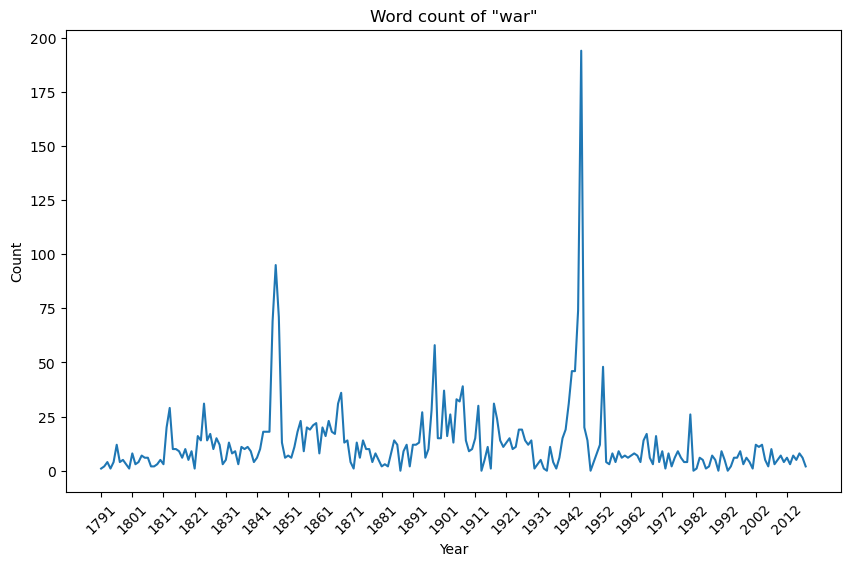

In [227]:
import matplotlib.pyplot as plt

# create a line plot with the values of our word_count column
ax = df['word_count'].plot(kind='line', figsize=(10, 6), title=f'Word count of "{word}"')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
# only show x axis label for every tenth year
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10], rotation=45)
plt.show()

### Plotly
Let's use an interactive plotting library, Plotly, to build a plot that will allow us to hover over specific points to find more information. This will allow us to pinpoint the spikes in the plot that show the highest frequency of 'war' mentions.

In [221]:
#!conda install plotly
import plotly.express as px

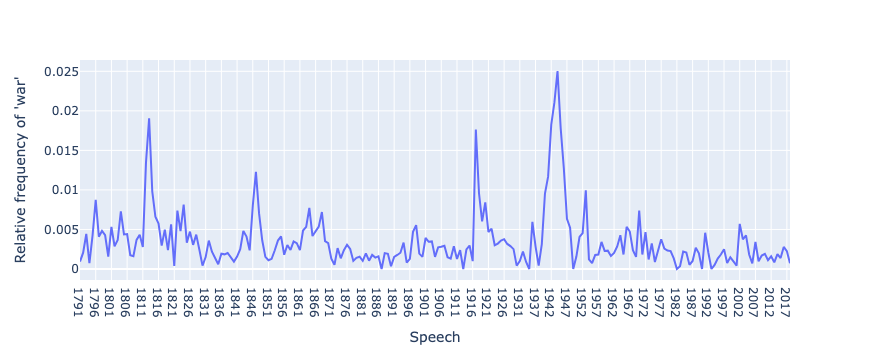

In [222]:
# create a line plot assigning the x and y axes
fig = px.line(x=df.index, y=df['ratio'])
# add labels
fig.update_layout(xaxis_title="Speech",
    yaxis_title="Relative frequency of 'war'")
fig.show()

The 1944 speech has the most frequent mention of the word 'war'. Let's take a closer look.

In [228]:
print(df.loc['1944']['name'])
print(df.loc['1944']['freq_dist'].most_common(25))


Roosevelt
[('war', 46), ('nation', 43), ('right', 20), ('servic', 16), ('congress', 13), ('peopl', 12), ('american', 12), ('men', 12), ('make', 10), ('peac', 10), ('time', 10), ('live', 10), ('polit', 9), ('one', 9), ('secur', 9), ('govern', 9), ('us', 8), ('shall', 8), ('mean', 8), ('standard', 8), ('must', 8), ('group', 8), ('home', 8), ('year', 7), ('world', 7)]


Alternately we could look at the plain word counts of 'war' from each speech. While the results are similar, it removes some spikes from speeches in 1813 and 1917, which shows that 'war' was a frequent topic relative to the length of those speeches. 

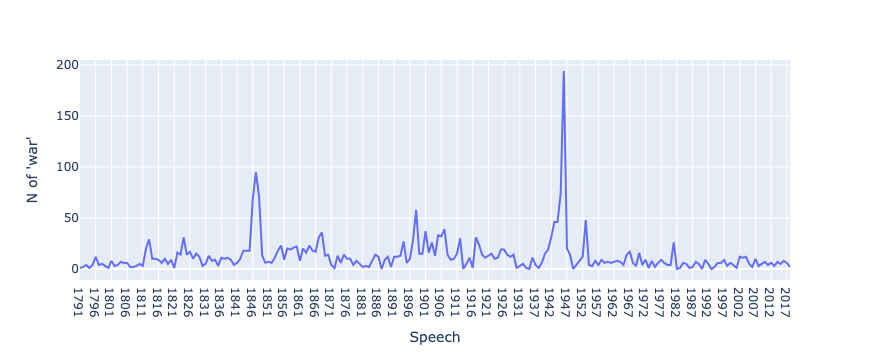

In [229]:
fig = px.line(x=df.index, y=df['word_count'])
fig.update_layout(xaxis_title="Speech",
    yaxis_title="N of 'war'")
fig.show()

In [230]:
# james madison, 1813, war of 1812
print(df.loc['1813']['name'])
print(df.loc['1813']['freq_dist'].most_common(10))


# woodrow wilson, 1917, wwi
print(df.loc['1917']['name'])
print(df.loc['1917']['freq_dist'].most_common(10))

Madison
[('war', 29), ('state', 20), ('british', 18), ('unit', 16), ('enemi', 16), ('nation', 13), ('power', 11), ('american', 11), ('command', 11), ('govern', 10)]
Wilson
[('war', 31), ('peopl', 31), ('must', 28), ('peac', 20), ('shall', 19), ('world', 19), ('nation', 18), ('purpos', 15), ('us', 13), ('wrong', 12)]


### Sentiment Analysis*

Sentiment analysis is an exploratory data analysis technique that "seeks to quantify the emotional intensity of words and phrases within a text." (quote from the [Programming Historian SA tutorial](https://programminghistorian.org/en/lessons/sentiment-analysis))

We can use more NLTK tools to run a simple sentiment analysis on our SOTU corpus. We'll download the vader_lexicon for sentiment analysis and the Vader and Sentiment modules. Don't worry if you see a warning that we don't have the twython library. We won't be using that since we're not analyzing twitter text.

In [183]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment

Note that we could use a tokenizer that works best for sentiment analysis (see the commented out code below). Since we've already tokenized our text we'll stick with that corpus. 

In [184]:
#nltk.download('punkt')
#tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

Let's initialize the vader SentimentIntensityAnalyzer and save it to a variable called sid.

In [186]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chennesy/nltk_data...


Now we can use the features of the sentiment analysis tool. You can take a look at some of those features by typing sid. and then tabbing through the options.

In [187]:
#sid

First let's look at the 'polarity_scores' for a specific speech. For Sentiment analysis we don't need the cleaned speech, so we'll go back to our original speeches list.

polarity_scores will give us positive and negative scores. This feature is built into VADER and can be requested on demand. We're going to go back to our original speeches dictionary, because we don't want to work with cleaned text for sentiment analysis. Punctuation, stop words, capitalization, etc. can all influence how positive or negative a text is deemed. For example, "AWESOME!" is more positive than "awesome?"

In [197]:
scores = sid.polarity_scores(speeches['Roosevelt_1938'])
scores

{'neg': 0.113, 'neu': 0.764, 'pos': 0.123, 'compound': 0.9945}

Now let's look at the scores for the entire speeches corpus.
We'll create another dictionary, 'all_scores', that will use the speeches index as the key, and the polarity_scores output as its value. Note that this means that the value for each item in 'all_scores' will contain *another* dictionary.

This might take a few minutes to run because it has to analyze all 235 speeches.

In [198]:
all_scores = {}
for k,v in speeches.items():
    all_scores[k] = sid.polarity_scores(v)

Now we can take a look at the scores for specific speeches by referencing the key of `all_scores`:

In [199]:
all_scores['Trump_2017']

{'neg': 0.094, 'neu': 0.697, 'pos': 0.208, 'compound': 1.0}

We can look at a specific score by referencing the key within the scores dictionary. 

In [200]:
all_scores['Trump_2017']['neg']

0.094

From here, we can list all of the negative scores for the corpus. 

To keep it somewhat simple, let's just create a new dictionary that will only contain negative scores. We can create an empty dictionary called negative, then cycle through each key:value item in the all_scores dictionary from above. For each item, we'll assign the index number as its key and the negative score as its value.

In [201]:
negative = {}
for score in all_scores.items():
    negative[score[0]] =  score[1]['neg']

This is a weird plot since our speeches dictionary, and our all_scores dictionaries are in alphabetical order, not in order by time. But we can still use it as a quick way to visualize the least and most negatives speeches. 

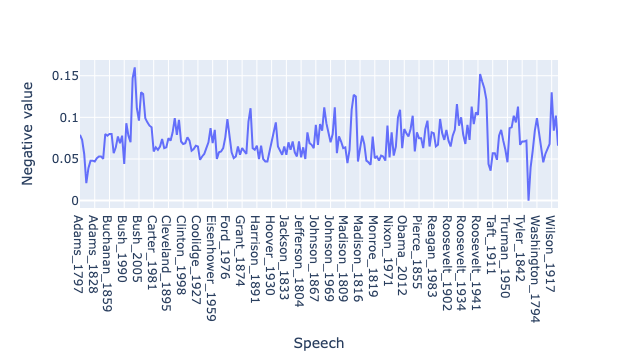

In [202]:
x_speech = list(negative.keys())
y_neg = list(negative.values())
fig = px.line(x=x_speech, y=y_neg)
fig.update_layout(xaxis_title="Speech",
    yaxis_title="Negative value")
fig.show()

#### Most negative speeches
The graph gives us a nice visualization of some overall trends, and we can take a closer look at some of the most negative speeches here. We could also sort our dictionary, using the `sorted()` method, to list the speeches with the most negative scores in the corpus.

In [203]:
sorted(negative, key=negative.get, reverse=True)[:5]

['Bush_2003',
 'Roosevelt_1942',
 'Bush_2002',
 'Roosevelt_1943',
 'Roosevelt_1944']

#### Least negative speeches
We can use the default sort (ascending values) to view the least negative speeches in the corpus.

In [204]:
sorted(negative, key=negative.get)[:5]

['Washington_1790', 'Adams_1800', 'Taft_1910', 'Adams_1825', 'Washington_1791']

## Where to go for help
- Contact LATISresearch@umn.edu
- [Libaries Text Mining guide](https://libguides.umn.edu/text-mining)
- [Join the Text as Data Practice Group email list]()